# Movie Popularity Exploration

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer

In [2]:
movies = pd.read_csv("../Data/tmdb.movies.csv")
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


array([[<AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

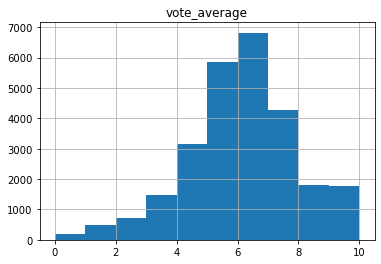

In [4]:
movies.hist("vote_average")

C:\Users\aburstyn\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

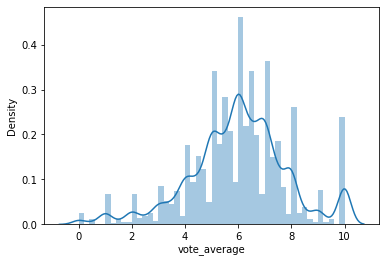

In [5]:
sns.distplot(movies["vote_average"])

In [6]:
stats.normaltest(movies["vote_average"])

NormaltestResult(statistic=683.0084812212335, pvalue=4.8595130892492035e-149)

In [7]:
len(movies)

26517

In [8]:
movies.nunique()

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

In [9]:
# keep only original entries
movies = movies.drop_duplicates(subset=["id"])

In [10]:
# keep only english movies
movies = movies[movies["original_language"]=="en"]

In [11]:
movies["genre_ids"].value_counts()

[99]                   3373
[]                     2337
[18]                   1570
[35]                   1442
[27]                   1085
                       ... 
[99, 80, 53, 36]          1
[80, 99, 10402]           1
[27, 18, 53, 10749]       1
[10402, 36]               1
[10751, 12, 28]           1
Name: genre_ids, Length: 2206, dtype: int64

In [12]:
movies[movies["title"]=="Baby Dolls Behind Bars"]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
5698,5698,[],134451,en,Baby Dolls Behind Bars,4.432,2012-06-01,Baby Dolls Behind Bars,4.9,4


Some entries have blank spaces for genres

In [13]:
movies = movies[(movies["genre_ids"]!="[]") & (movies["genre_ids"]!="")]

In [14]:
# get rid of [] in genre ids
movies["genre_ids"] = movies["genre_ids"].str.replace('[', '')
movies["genre_ids"] = movies["genre_ids"].str.replace(']', '')
movies["genre_ids"] = movies["genre_ids"].str.replace(' ', '')
movies.head()

<ipython-input-14-b05a812c2a72>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["genre_ids"] = movies["genre_ids"].str.replace('[', '')
<ipython-input-14-b05a812c2a72>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["genre_ids"] = movies["genre_ids"].str.replace(']', '')


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"12,14,10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"14,12,16,10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"12,28,878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"16,35,10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"28,878,12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
movies["genre_ids"] = movies["genre_ids"].str.split(',')
clean_df = movies.explode("genre_ids").reset_index(drop=True)
clean_df["genre_ids"] = clean_df["genre_ids"].astype(int)

In [16]:
clean_df["genre_ids"].unique()

array([   12,    14, 10751,    16,    28,   878,    35,    53,    27,
          80,    18, 10749,  9648,    36,    37, 10770, 10752, 10402,
          99])

# get a df of movie titles, popularity, and individual genres
genres = []
titles = []

for index, row in movies.iterrows():
    genre_ids = row["genre_ids"].split(',')
    for ids in genre_ids:
        if ids!='':
            genres.append(int(ids))
            titles.append(row["title"])
        
clean_df = pd.DataFrame({"title": titles, "genre": genres})
clean_df

### Convert genre_ids to names

In [17]:
# create a genre dictionary from TMDB website
genre_dict = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [18]:
clean_df["genre"] = clean_df["genre_ids"].map(genre_dict)
clean_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
1,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
2,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
3,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
4,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
37317,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
37318,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
37319,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
37320,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


# recover the rest of the original table
clean_df = clean_df.merge(movies, on="title", how="left")
clean_df

In [19]:
# keep only movies in the past 10 years and keep only one record for each movie and genre
clean_df = clean_df[clean_df["release_date"]>"2012"].drop_duplicates(subset=["title", "genre", "release_date"])
clean_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
641,258,18,39356,en,Boy,7.759,2012-03-02,Boy,7.5,149,Drama
642,258,35,39356,en,Boy,7.759,2012-03-02,Boy,7.5,149,Comedy
1123,530,18,55061,en,Frankie & Alice,3.690,2014-04-04,Frankie & Alice,5.7,43,Drama
1124,530,53,55061,en,Frankie & Alice,3.690,2014-04-04,Frankie & Alice,5.7,43,Thriller
1222,587,18,61980,en,Seeing Heaven,3.209,2012-07-16,Seeing Heaven,3.7,9,Drama
...,...,...,...,...,...,...,...,...,...,...,...
37317,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
37318,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
37319,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
37320,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


In [20]:
movies[movies["title"]=="Boy"]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
258,258,"[18, 35]",39356,en,Boy,7.759,2012-03-02,Boy,7.5,149


In [21]:
# groupby genre popularity
genres_df = clean_df.groupby("genre").mean()[["popularity"]].sort_values("popularity", ascending=False)
genres_df

,popularity
genre,
Adventure,7.924327
Action,6.921186
Fantasy,6.331009
War,5.605135
Crime,5.404539
Science Fiction,5.228337
Thriller,4.862404
Mystery,4.648363
Family,4.489648


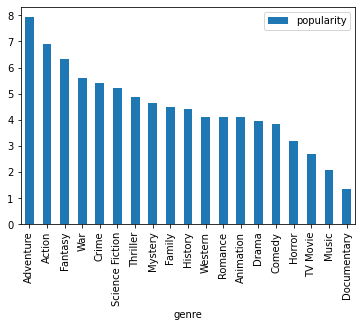

In [22]:
genres_df.plot.bar();

## t-test for differences

In [23]:
adventures = clean_df[clean_df["genre"]=="Adventure"]
actions = clean_df[clean_df["genre"]=="Action"]

In [24]:
# alpha=.05
stats.ttest_ind(adventures["popularity"], actions["popularity"], alternative="greater")

Ttest_indResult(statistic=2.608371176310205, pvalue=0.004576071513837843)

for the most popularity per TMDB website (added to favorites/likes) include an "Adventure" tag in your genre

In [25]:
# alpha=.05
stats.ttest_ind(adventures["vote_average"], actions["vote_average"])

Ttest_indResult(statistic=5.658039300449579, pvalue=1.7074178297315673e-08)

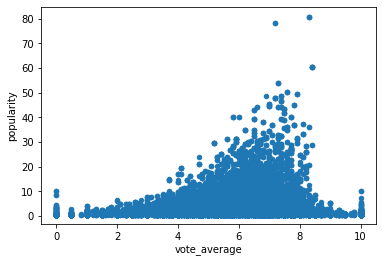

In [26]:
clean_df.plot(kind="scatter", y="popularity", x="vote_average");

In [27]:
# groupby genre popularity
genres_df_votes = clean_df[clean_df["vote_count"]>100]
genres_df_votes = genres_df_votes.groupby("genre").mean()[["vote_average"]].sort_values("vote_average", ascending=False)
genres_df_votes

,vote_average
genre,
Documentary,7.367059
Music,6.866667
History,6.786517
Animation,6.716970
War,6.708621
Family,6.543939
Drama,6.491051
Romance,6.469388
Fantasy,6.367500


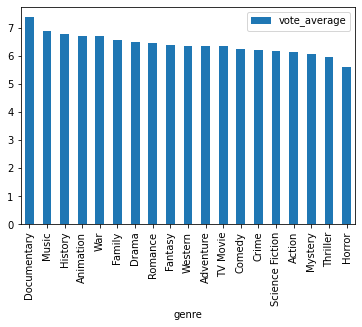

In [28]:
genres_df_votes.plot.bar();

In [29]:
# alpha=.05
stats.ttest_ind(adventures["vote_average"], actions["vote_average"], alternative="greater")

Ttest_indResult(statistic=5.658039300449579, pvalue=8.537089148657837e-09)